# E-commerce Exploratory Data Analysis
_________________

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#from scipy import stas
#import math 
#import random
#import sys
#import pickle


## Load Data
____________

In [2]:
eco = pd.read_csv(r'ecommerce.csv') #read the data 

eco.head()

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
0,AU-2015-1,11/9/15,11/17/15,8.0,First Class,Auto & Accessories,Car Media Players,$140.00,2,0.05,...,$4.60,Medium,LS-001,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania,Nov
1,AU-2015-2,6/30/15,7/2/15,2.0,First Class,Auto & Accessories,Car Speakers,$211.00,3,0.03,...,$11.20,Medium,IZ-002,Alvarado Kriz,Home Office,Berlin,Berlin,Germany,Central,Jun
2,AU-2015-3,12/5/15,12/13/15,8.0,First Class,Auto & Accessories,Car Body Covers,$117.00,5,0.01,...,$3.10,Critical,EN-003,Moon Weien,Consumer,Porirua,Wellington,New Zealand,Oceania,Dec
3,AU-2015-4,5/9/15,5/16/15,7.0,First Class,Auto & Accessories,Car & Bike Care,$118.00,2,0.05,...,$2.60,High,AN-004,Sanchez Bergman,Corporate,Kabul,Kabul,Afghanistan,Central Asia,May
4,AU-2015-5,7/9/15,7/18/15,9.0,First Class,Auto & Accessories,Tyre,$250.00,1,0.04,...,$16.00,Critical,ON-005,Rowe Jackson,Corporate,Townsville,Queensland,Australia,Oceania,Jul


In [3]:
eco.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Aging', 'Ship Mode',
       'Product Category', 'Product', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Country', 'Region',
       'Months'],
      dtype='object')

In [4]:
eco.shape

(51290, 21)

In [5]:
eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          51290 non-null  object 
 1   Order Date        51289 non-null  object 
 2   Ship Date         51290 non-null  object 
 3   Aging             51289 non-null  float64
 4   Ship Mode         51290 non-null  object 
 5   Product Category  51290 non-null  object 
 6   Product           51290 non-null  object 
 7   Sales             51290 non-null  object 
 8   Quantity          51289 non-null  object 
 9   Discount          51290 non-null  object 
 10  Profit            51290 non-null  object 
 11  Shipping Cost     51290 non-null  object 
 12  Order Priority    51288 non-null  object 
 13  Customer ID       51289 non-null  object 
 14  Customer Name     51290 non-null  object 
 15  Segment           51289 non-null  object 
 16  City              51290 non-null  object

In [6]:
eco.dtypes

Order ID             object
Order Date           object
Ship Date            object
Aging               float64
Ship Mode            object
Product Category     object
Product              object
Sales                object
Quantity             object
Discount             object
Profit               object
Shipping Cost        object
Order Priority       object
Customer ID          object
Customer Name        object
Segment              object
City                 object
State                object
Country              object
Region               object
Months               object
dtype: object

In [7]:
eco['Sales'] = eco['Sales'].str.replace('$',"")

In [8]:
eco['Sales'] = eco['Sales'].str.replace('xf',"0")

In [9]:
eco['Sales'] = eco['Sales'].astype(float)

In [10]:
eco['Discount'] = eco['Discount'].str.replace('xxx',"0")

In [11]:
eco['Discount'] = eco['Discount'].astype(float)

In [12]:
eco['Shipping Cost'] = eco['Shipping Cost'].str.replace('$',"")

In [13]:
eco['Shipping Cost'] = eco['Shipping Cost'].str.replace('test',"0")

In [14]:
eco['Shipping Cost'] = eco['Shipping Cost'].astype(float)

In [15]:
eco['Profit'] = eco['Profit'].str.replace('$',"")

In [16]:
eco['Profit'] = eco['Profit'].astype(float)

In [17]:
eco['Quantity'] = eco['Quantity'].str.replace('abc',"0")

In [18]:
eco['Quantity'] = eco['Quantity'].astype(float)

In [19]:
eco['Order Date'] = pd.to_datetime(eco['Order Date'])

In [20]:
eco['Ship Date'] = pd.to_datetime(eco['Ship Date'])

In [21]:
eco.dtypes

Order ID                    object
Order Date          datetime64[ns]
Ship Date           datetime64[ns]
Aging                      float64
Ship Mode                   object
Product Category            object
Product                     object
Sales                      float64
Quantity                   float64
Discount                   float64
Profit                     float64
Shipping Cost              float64
Order Priority              object
Customer ID                 object
Customer Name               object
Segment                     object
City                        object
State                       object
Country                     object
Region                      object
Months                      object
dtype: object

In [22]:
eco.isnull().sum()

Order ID                0
Order Date              1
Ship Date               0
Aging                   1
Ship Mode               0
Product Category        0
Product                 0
Sales                   0
Quantity            18523
Discount            18522
Profit                  0
Shipping Cost           0
Order Priority          2
Customer ID             1
Customer Name           0
Segment                 1
City                    0
State                   0
Country                 0
Region                  1
Months                  0
dtype: int64

In [23]:
 eco['Aging'] = eco['Aging'].fillna(eco.Aging.mean()) # fill the null with the mean 

In [24]:
eco['Order Date'] = eco['Order Date'].fillna(12/13/15) #fill the null with value 

In [25]:
eco['Quantity'] = eco['Quantity'].fillna(eco.Quantity.mean())#fill the null with the mean 

In [26]:
eco['Region'] = eco['Region'].fillna('Oceania')

In [27]:
eco['Segment'] = eco['Segment'].fillna('Corporate')

In [28]:
 eco['Order Priority'] = eco['Order Priority'].fillna('low')

In [29]:
 eco['Customer ID'] = eco['Customer ID'].fillna("EN-003")

In [30]:
print(eco.duplicated())  

0        False
1        False
2        False
3        False
4        False
         ...  
51285    False
51286    False
51287    False
51288    False
51289    False
Length: 51290, dtype: bool


In [31]:
eco.drop('Months', axis=1, inplace=True) 

In [32]:
eco.shape

(51290, 20)

In [33]:
eco.sample(5)

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region
9454,El-2015-1950,2015-08-26 00:00:00,2015-08-26,1.0,Same Day,Electronic,Tablet,199.0,5.0,0.05,69.3,6.9,Medium,ON-009455,Spears Thornton,Corporate,Manila,National Capital,Philippines,Southeast Asia
23916,FA-2015-3402,2015-03-22 00:00:00,2015-03-28,6.0,Standard Class,Fashion,Jeans,218.0,4.0,0.05,94.4,9.4,Medium,LE-0013608,Reid Engle,Home Office,Louisville,Kentucky,United States,South
15127,HF-2015-4922,2015-12-19 00:00:00,2015-12-23,4.0,Second Class,Home & Furniture,Bed Sheets,211.0,5.0,0.03,99.4,9.9,High,NG-0045903,Charles Norling,Consumer,San Francisco,California,United States,West
12784,HF-2015-2579,2015-05-25 00:00:00,2015-05-30,5.0,Second Class,Home & Furniture,Umbrellas,70.0,1.0,0.04,70.0,7.0,High,KI-0043560,Fitzgerald Klamczynski,Corporate,Henderson,Kentucky,United States,South
12651,HF-2015-2446,2015-11-18 00:00:00,2015-11-21,3.0,Second Class,Home & Furniture,Beds,78.0,1.0,0.04,78.0,7.8,High,CH-0043427,Lambert Glotzbach,Consumer,Manila,National Capital,Philippines,Southeast Asia


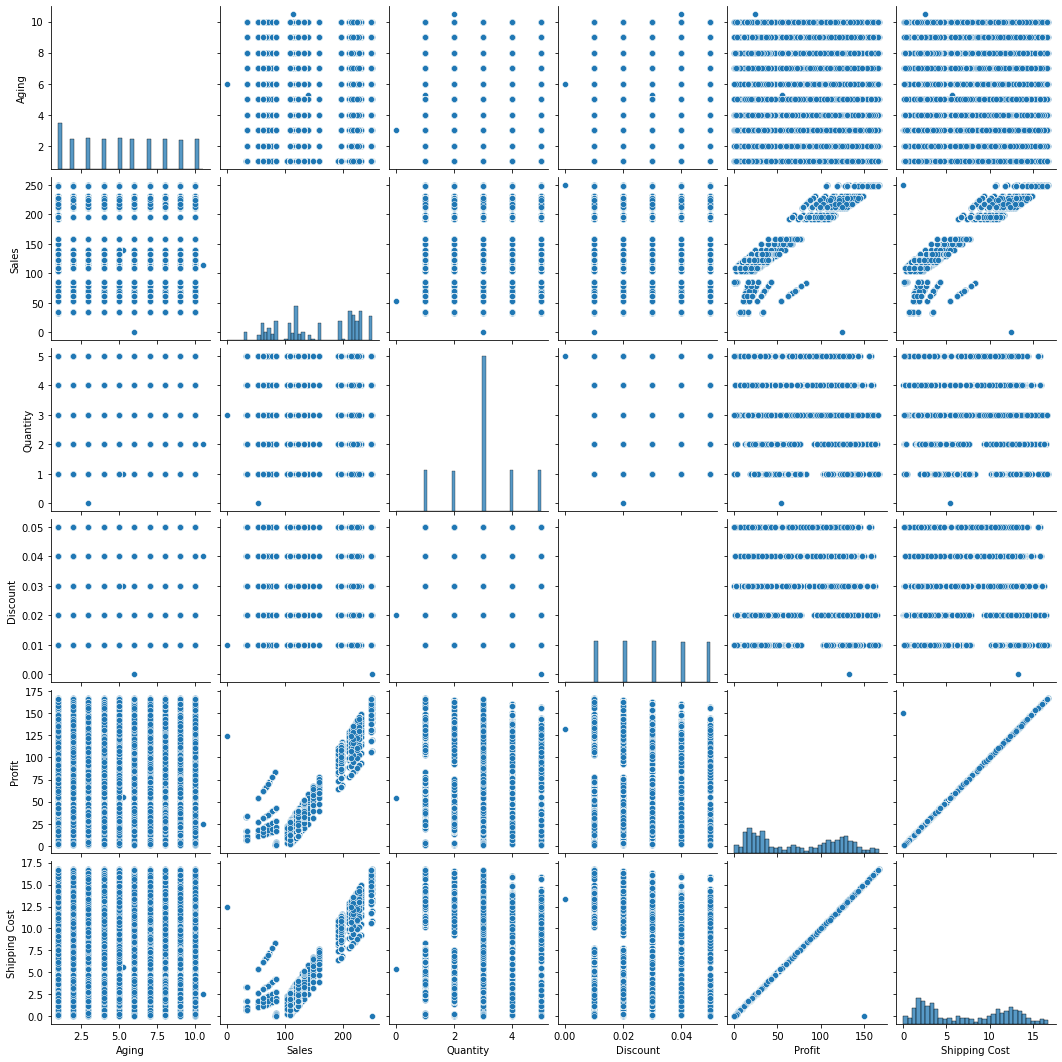

In [34]:
sns.pairplot(eco)

In [35]:
#eco.hist(column='Profit', bins=20, grid=False, figsize=(10,8), color='#c793bb', zorder=1, rwidth=0.9)
#plt.title('Profit',fontsize = 30,color='b');

In [36]:
eco_subset = eco.loc[:, ["Aging","Sales","Profit","Quantity","Shipping Cost"]]

In [37]:
eco_subset_corr = pd.DataFrame(np.corrcoef(eco_subset.T))
eco_subset_corr.columns = ["Aging","Sales","Profit","Quantity","Shipping Cost"]

eco_subset_corr.index = ["Aging","Sales","Profit","Quantity","Shipping Cost"]
eco_subset_corr

,Aging,Sales,Profit,Quantity,Shipping Cost
Aging,1.000000,0.014823,0.015231,-0.002370,0.015191
Sales,0.014823,1.000000,0.921406,-0.002661,0.921073
Profit,0.015231,0.921406,1.000000,-0.150204,0.999891
Quantity,-0.002370,-0.002661,-0.150204,1.000000,-0.150456
Shipping Cost,0.015191,0.921073,0.999891,-0.150456,1.000000


In [38]:
Sales_Norm = (eco_subset['Sales']-np.mean(eco_subset['Sales']))/np.std(eco_subset['Sales'])
Profit_Norm = (eco_subset['Profit']-np.mean(eco_subset['Profit']))/np.std(eco_subset['Profit'])

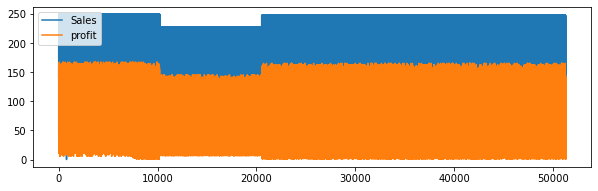

In [39]:
plt.figure(figsize=[10,10])
plt.subplot(3,1,1)
plt.plot(eco_subset['Sales'])
plt.plot(eco_subset['Profit'])
plt.legend(['Sales','profit'])